$\newcommand{\si}{\sigma}
\newcommand{\al}{\alpha}
\newcommand{\tta}{\theta}
\newcommand{\Tta}{\Theta}
\newcommand{\Si}{\Sigma}
\newcommand{\ld}{\ldots}
\newcommand{\cd}{\cdots}
\newcommand{\Ga}{\Gamma} 
\newcommand{\bet}{\beta}
\newcommand{\cU}{\mathcal{U}}
\newcommand{\cN}{\mathcal{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\p}{\mathbb{P}}
\newcommand{\f}{\frac}
\newcommand{\ff}{\frac{1}}
\newcommand{\ds}{\displaystyle}
\newcommand{\bE}{\mathbf{E}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\bF}{\mathbf{F}}
\newcommand{\ii}{\mathrm{i}}
\newcommand{\me}{\mathrm{e}}
\newcommand{\hsi}{\hat{\sigma}}
\newcommand{\hmu}{\hat{\mu}}
\newcommand{\ste}{\, ;\, }
\newcommand{\op}{\operatorname} 
\newcommand{\argmax}{\op{argmax}}
\newcommand{\lfl}{\lfloor}
\newcommand{\ri}{\right}
\newcommand{\supp}{\operatorname{supp}}$

# Echantillonnage préférentiel (*importance sampling*)


## Exercice 1

On souhaite calculer numériquement l'intégrale 
$$\int_0^{10} e^{-2|x-5|}dx.$$
Une première manière de faire est d'écrire cette intégrale comme 
$$10\E[g(X)]$$
avec $g(x) = e^{-2|x-5|}$ et avec $X$ de loi uniforme sur $[0,10]$. 

1. Utilisez la méthode de Monte-Carlo pour approcher l'intégrale précédente : tirez $N$ réalisations indépendantes $x_1\dots x_N$ d'une loi uniforme sur $[0,10]$ et l'approximation est donnée par 
$$10 \frac 1 N \sum_{i=1}^N e^{-2|x_i-5|}.$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

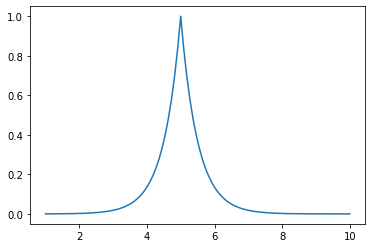

In [2]:
x = np.linspace(1,10,100)
def g(x):
    return np.exp(-2*np.abs(x-5))
plt.plot(x,g(x))

In [3]:
def monte_carlo(N, cp):
    Xi = 10*np.random.uniform(size = N)
    Xn = 10*np.mean(g(Xi))
    sigma = np.std(10*g(Xi))
    erreur = (sigma*cp)/np.sqrt(N)
    print("\nEstimation de 10E[g(X)] : "+str(Xn))
    print("\nMarge d'erreur à "+str(round(100*p))+"% : "+str(erreur))
    return Xn, sigma, erreur

In [4]:
N = int(1e3)
cp = np.random.choice([1.65, 1.96, 2.58])
if cp == 1.65:
    p = 0.9
elif cp == 1.96:
    p = 0.95
elif cp == 2.58:
    p = 0.99
    
m1, sigma1, erreur1 = monte_carlo(N, cp)


Estimation de 10E[g(X)] : 0.9177023485178298

Marge d'erreur à 99% : 0.15270693077961692


Cependant, la fonction $g$ atteint son maximum en $x=5$ et décroît
rapidement après, il est
donc sans doute plus malin d'utiliser une fonction d'échantillonnage
préférentiel gaussienne $f_Y$ centrée en 5 et de variance 1 (par exemple). On réécrit donc  
$$\int_0^{10} e^{-2|x-5|}dx = \int \mathbf{1}_{[0,10]}(x)
\frac{e^{-2|x-5|}}{\frac{1}{\sqrt{2\pi}}e^{-(x-5)^2/2}}\frac{1}{\sqrt{2\pi}}e^{-(x-5)^2/2}dx
= \E[\frac{g(Y)}{f_Y(Y)}  \mathbf{1}_{[0,10]}(Y)],$$
avec $f_Y(x) = \frac 1 {\sqrt{2\pi} }e^{-(x-5)^2/2} $ et $Y$ de loi gaussienne $\mathcal{N}(5,1)$.

Pour calculer l'intégrale précédente, on tire donc $N$ réalisations indépendantes $x_1\dots x_N$ d'une loi $\mathcal{N}(5,1)$ et l'approximation est donnée par 
$$ \frac 1 N \sum_{i=1}^N \sqrt{2\pi}e^{+(y_i-5)^2/2}e^{-2|y_i-5|} \times \mathbf{1}_{[0,10]}(y_i).$$

2. Utilisez cette nouvelle approche pour calculer l'intégrale et comparer les variances et vitesses de convergence des deux approches. 

In [5]:
def monte_carlo2(N, cp):
    Yi = 5 + np.random.randn(N)
    gf = lambda x: (np.sqrt(2*np.pi) * np.exp((1/2)*(x-5)**2) * g(x))*(0 <= x)*(x <= 10)
    Xn = np.mean(gf(Yi))
    sigma = np.std(gf(Yi))
    erreur = (sigma*cp)/np.sqrt(N)
    print("\nEstimation de E[g(Y)/fY(Y)] : "+str(Xn))
    print("\nMarge d'erreur à "+str(round(100*p))+"% : "+str(erreur))
    return Xn, sigma, erreur

In [6]:
N = int(1e3)
m2, sigma2, erreur2 = monte_carlo2(N, cp)


Estimation de E[g(Y)/fY(Y)] : 0.9710131766145205

Marge d'erreur à 99% : 0.04696055396071784


In [7]:
N = int(1e6)
t0 = time.time()
m1, sigma1, erreur1 = monte_carlo(N, cp)
t1 = time.time() - t0

t2 = time.time()
m2, sigma2, erreur2 = monte_carlo2(N, cp)
t3 = time.time() - t2

print("\nVariance de la 1ère méthode: "+str(sigma1**2)+" \nVariance de la 2nde méthode: "+str(sigma2**2))
print("\nVitesse de convergence de la 1ère méthode: "+str(t1)+"\nVitesse de convergence de la 2nde méthode: "+str(t3))


Estimation de 10E[g(X)] : 0.9998313212103788

Marge d'erreur à 99% : 0.005154849245736838

Estimation de E[g(Y)/fY(Y)] : 1.0005498283740328

Marge d'erreur à 99% : 0.0015433941702137765

Variance de la 1ère méthode: 3.992018320154085 
Variance de la 2nde méthode: 0.3578609405459215

Vitesse de convergence de la 1ère méthode: 0.08904790878295898
Vitesse de convergence de la 2nde méthode: 0.14403820037841797


## Exercice 2

On souhaite calculer 
$$\int_{-\infty}^{+\infty} x^2 \frac 1 2 e^{-|x|}dx,$$
mais on ne sait pas échantillonner suivant la densité $p(x) = \frac 1 2 e^{-|x|}dx$.

Réécrire cette intégrale à l'aide d'une fonction d'échantillonnage préférentiel gaussienne de $\cN(0,4)$ et estimer sa valeur par une méthode de MOnte-Carlo. 

Une fonction d'échantillonnage préférentiel gaussienne $f_Y$ centrée et de variance 4. On réécrit donc  
$$\int_{-\infty}^{+\infty} x^2 \frac{1}{2}e^{-|x|}dx = \int \mathbf{1}_{\mathbb{R}}(x) x^2
\frac{1}{2.\frac{1}{2\sqrt{2\pi}}e^{-(x)^2/8}}e^{-|x|}\frac{1}{2\sqrt{2\pi}}e^{-(x)^2/8}dx
= \E[\frac{g(Y)}{f_Y(Y)}  \mathbf{1}_{\mathbb{R}}(Y)],$$
avec $f_Y(x) = \frac 1 {2\sqrt{2\pi} }e^{-(x)^2/8} $ et $Y$ de loi gaussienne $\mathcal{N}(0,4)$.

Pour calculer l'intégrale précédente, on tire donc $N$ réalisations indépendantes $x_1\dots x_N$ d'une loi $\mathcal{N}(0,4)$ et l'approximation est donnée par 
$$ \frac 1 N \sum_{i=1}^N \sqrt{2\pi}x^2e^{(y_i)^2/8}e^{-|y_i|} \times \mathbf{1}_{\mathbb{R}}(y_i).$$

2. Utilisez cette nouvelle approche pour calculer l'intégrale et comparer les variances et vitesses de convergence des deux approches. 

In [8]:
def monte_carlo3(N, cp):
    Yi = 2*np.random.randn(N)
    densite_p = lambda x : np.sqrt(2*np.pi)* x**2 *np.exp((1/8)*(x)**2)*np.exp(-np.abs(x))
    Xn = np.mean(densite_p(Yi))
    sigma = np.std(densite_p(Yi))
    erreur = (sigma*cp)/np.sqrt(N)
    print("\nEstimation de E[p(Y)/fY(Y)] : "+str(Xn))
    print("\nMarge d'erreur à "+str(round(100*p))+"% : "+str(erreur))
    return Xn, sigma, erreur

In [9]:
N = int(1e6)
m3, sigma3, erreur3 = monte_carlo3(N, cp)


Estimation de E[p(Y)/fY(Y)] : 2.0096462731219997

Marge d'erreur à 99% : 0.020672926401995077
